In [11]:
%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [12]:
data = pd.read_csv("./data/train.csv")
data.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S


<AxesSubplot:xlabel='Sex'>

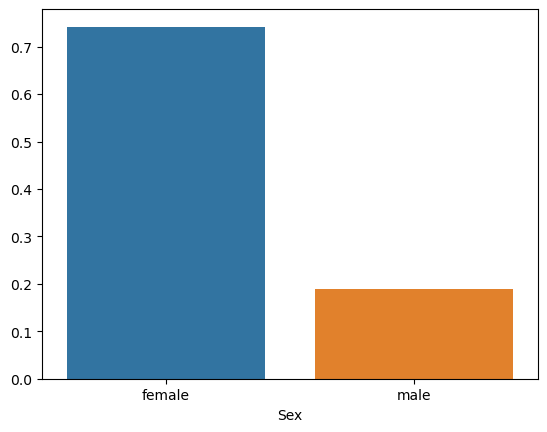

In [13]:
#Est ce que la variable homme/femme a un impact sur le taux de survie ?
gb = data.groupby("Sex")["Survived"].mean()
sns.barplot(x = gb.index, y = gb.values)

<AxesSubplot:xlabel='no_cabin'>

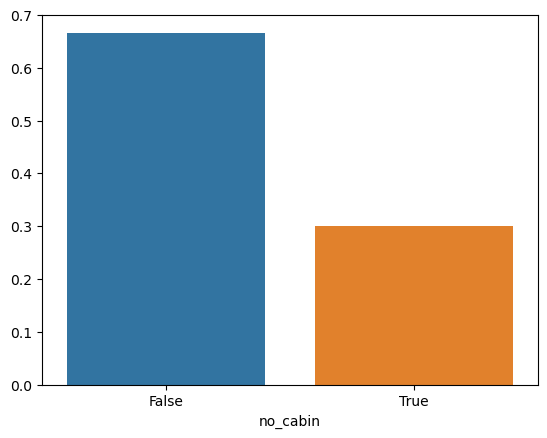

In [14]:
data["no_cabin"] = data["Cabin"].isna()
#Est ce que la variable has_cabin a un impact sur le taux de survie ?
gb = data.groupby("no_cabin")["Survived"].mean()
sns.barplot(x = gb.index, y = gb.values)

<AxesSubplot:xlabel='age_uknown'>

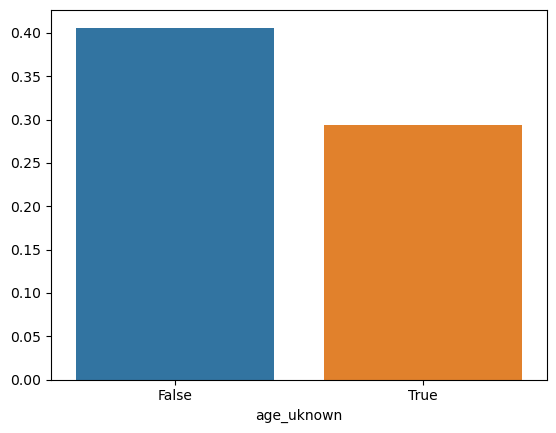

In [15]:
data["age_uknown"] = data["Age"].isna()
gb = data.groupby("age_uknown")["Survived"].mean()
sns.barplot(x = gb.index, y = gb.values)

<AxesSubplot:xlabel='decade', ylabel='Survived'>

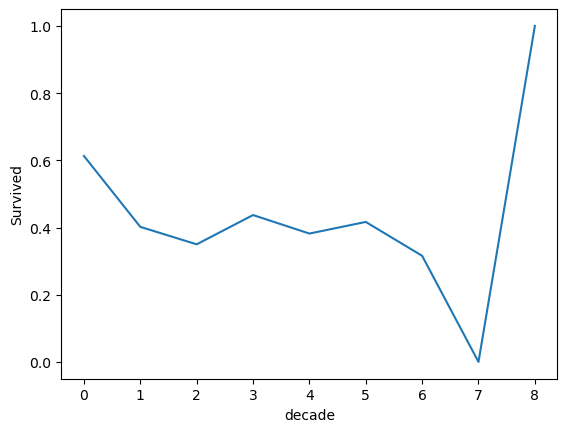

In [16]:
data["decade"] = data["Age"] // 10
gb = data.groupby("decade")["Survived"].mean()
sns.lineplot(gb)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

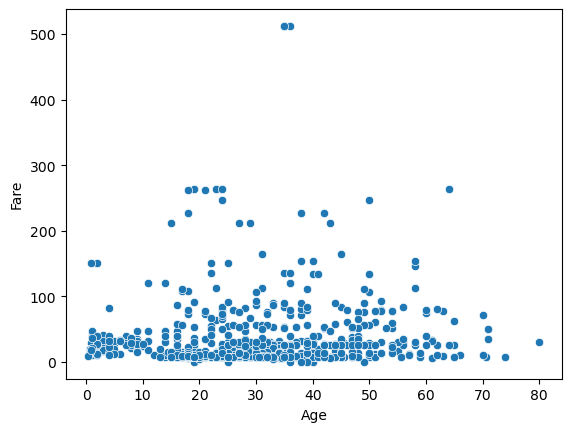

In [17]:
sns.scatterplot(x = data["Age"], y = data["Fare"])

<AxesSubplot:xlabel='name_length'>

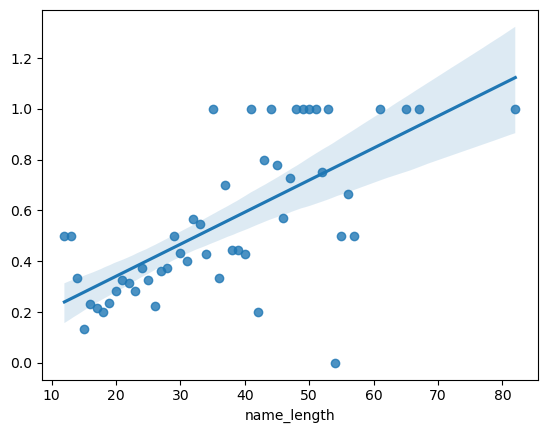

In [18]:
data["name_length"] = data["Name"].apply(lambda x : len(x))
gb = data.groupby("name_length")["Survived"].mean()
sns.regplot(x=gb.index, y=gb.values)

<AxesSubplot:xlabel='word_count'>

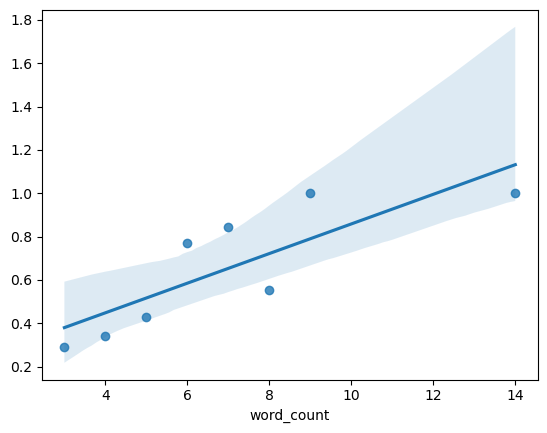

In [19]:
data["word_count"] = data["Name"].apply(lambda x : len(x.split()))
gb = data.groupby("word_count")["Survived"].mean()
sns.regplot(x=gb.index, y=gb.values)

<AxesSubplot:xlabel='currency', ylabel='Survived'>

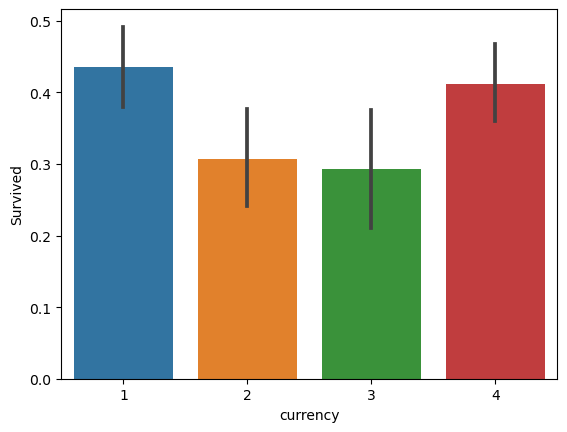

In [20]:
data["currency"] = data["Fare"].apply(lambda x : len(str(float(x)).split(".")[1]))
sns.barplot(data = data, x="currency", y="Survived")
